In [ ]:
import pandas_datareader as pdr
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2024,7,20)
print(start)
print(end)

2018-01-01 00:00:00
2024-07-20 00:00:00


In [ ]:
stock = ['IBN']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


In [ ]:
newdata= data.reset_index()
newdata.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
1,2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2,2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
3,2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
4,2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


In [ ]:
newdata.to_csv('ICICI.csv')

In [ ]:
path = '/content/ICICI.csv'
# path = '/content/TSLA.csv'
icici = pd.read_csv(path)
icici.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0
1,1,2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0
2,2,2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0
3,3,2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0
4,4,2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0


In [ ]:
# icici_data.set_index('Date', inplace=True)
icici.head()
icici.sort_index(inplace=True)

<Axes: title={'center': 'ICICI stock price'}, xlabel='Date', ylabel='Price'>

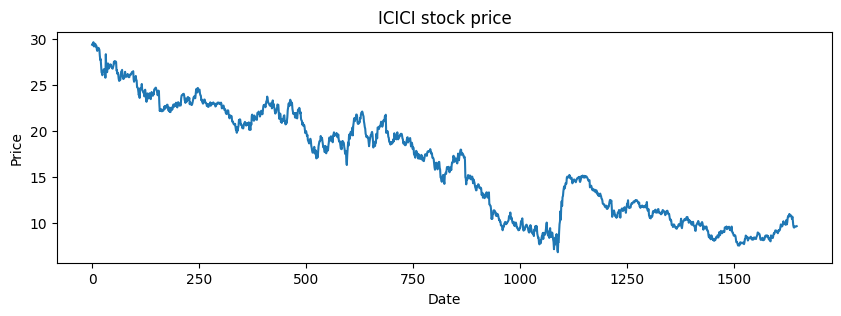

In [ ]:
close_price = icici['Close']

close_price.plot(xlabel='Date',ylabel='Price',label='ICICI',title=
                'ICICI stock price',figsize=(10,3))


In [ ]:
close_price = icici['Close']
vol_data = icici['Volume']
high_price = icici['High']
low_price = icici['Low']
open_price = icici['Open']

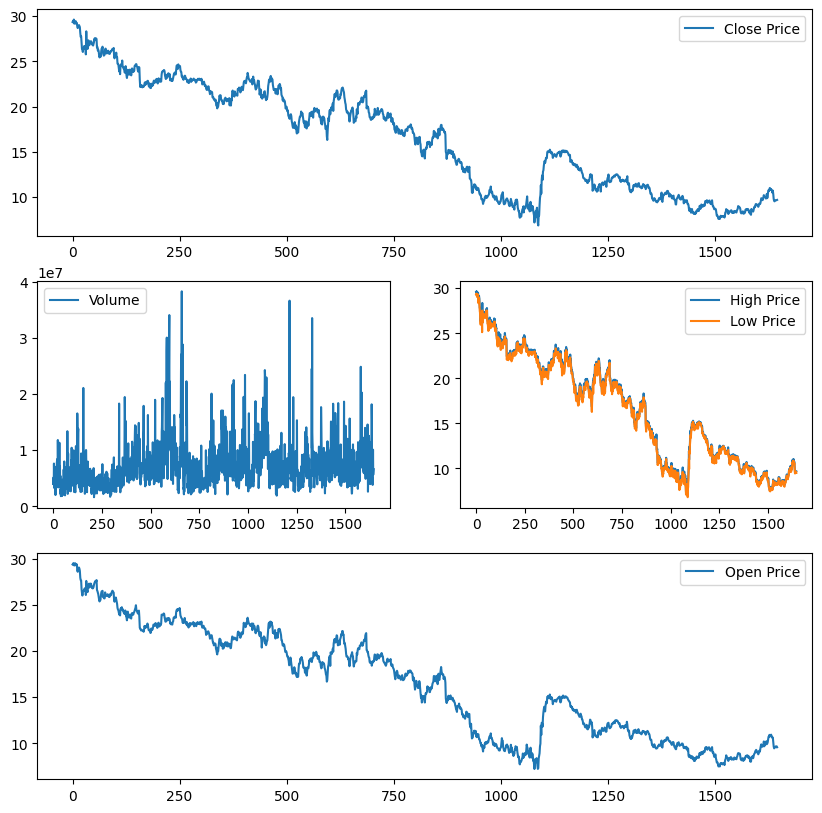

In [ ]:
plt.figure(figsize=(10,10))

# Subplot for Close Price
plt.subplot(3,1,1)
plt.plot(close_price, label='Close Price')
plt.legend()

# Subplot for Volume
plt.subplot(3,2,3)
plt.plot(vol_data, label='Volume')
plt.legend()

# Subplot for High/Low Price
plt.subplot(3,2,4)
plt.plot(high_price, label='High Price')
plt.plot(low_price, label='Low Price')
plt.legend()

# Subplot for Open Price
plt.subplot(3,1,3)
plt.plot(open_price, label='Open Price')
plt.legend()

plt.show()


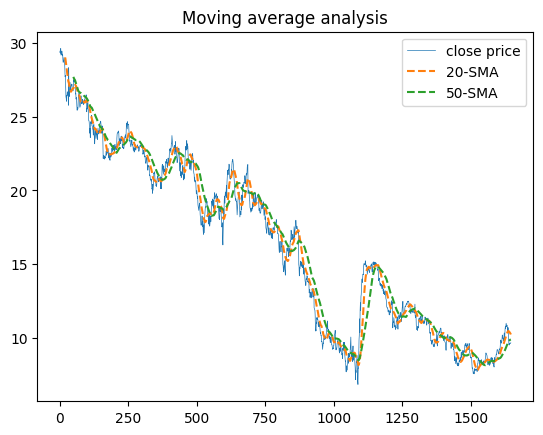

In [ ]:
# calulate the moving average
icici['SMA_20'] = icici['Close'].rolling(20).mean()
icici['SMA_50'] = icici['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(icici['Close'],label='close price',linewidth=0.5)
plt.plot(icici['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(icici['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()
plt.show()



In [ ]:
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=bb74b2bade92b88d5510c62b93a36d8e07be1a106fe6008a471fd5664f6c0399
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


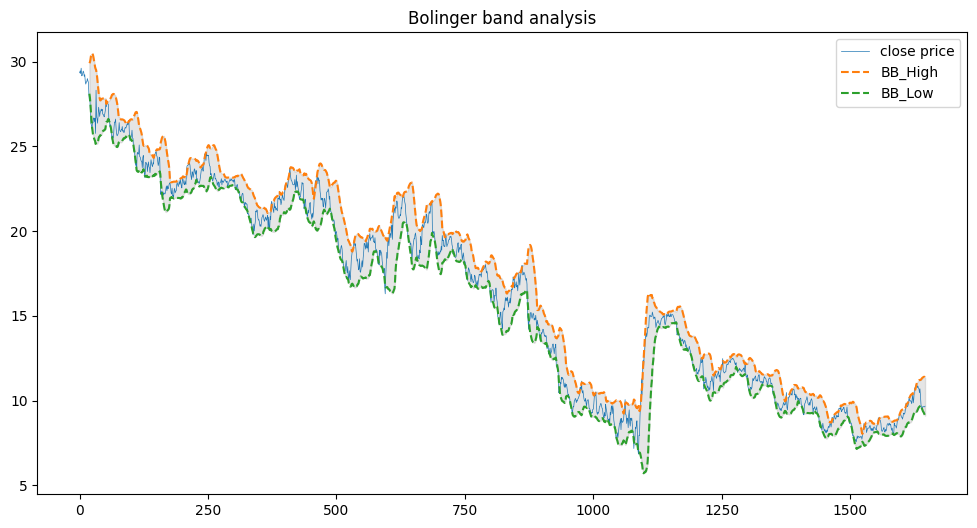

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(icici['Close'],window=20,window_dev=2)

icici['BB_High']=bb.bollinger_hband()
icici['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(icici['Close'],label='close price',linewidth=0.5)
plt.plot(icici['BB_High'],label='BB_High',linestyle='--')
plt.plot(icici['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(icici.index,icici['BB_High'],
                 icici['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()
plt.show()

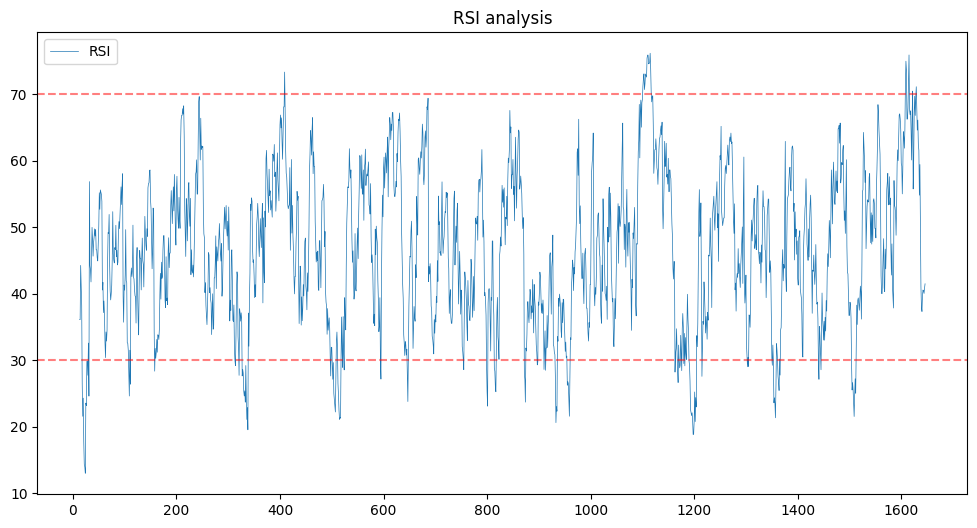

In [ ]:
# relative strength index
icici['RSI'] = ta.momentum.rsi(icici['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(icici['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()


In [ ]:
icici.tail()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
1642,1642,2018-01-08,IBN,9.65091,9.66086,9.57332,9.65091,5.311405e+06,10.367929,9.851321,11.376584,9.359274,40.541085
1643,1643,2018-01-05,IBN,9.64196,9.65091,9.50469,9.62207,1.010170e+07,10.356639,9.866019,11.392133,9.321145,40.384751
1644,1644,2018-01-04,IBN,9.62207,9.71060,9.60217,9.67081,5.625544e+06,10.333113,9.881300,11.412005,9.254220,40.015449
1645,1645,2018-01-03,IBN,9.65091,9.70065,9.63201,9.68075,6.277079e+06,10.287503,9.893824,11.400242,9.174764,40.859932
1646,1646,2018-01-02,IBN,9.67081,9.68075,9.50469,9.58228,6.635720e+06,10.233138,9.903220,11.354806,9.111471,41.472221


In [ ]:
icici.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
0,0,2024-07-19,IBN,29.35,29.61,29.345,29.36,4027158.0,NaN,NaN,NaN,NaN,NaN
1,1,2024-07-18,IBN,29.46,29.55,29.400,29.41,5150982.0,NaN,NaN,NaN,NaN,NaN
2,2,2024-07-17,IBN,29.30,29.54,29.250,29.51,3872244.0,NaN,NaN,NaN,NaN,NaN
3,3,2024-07-16,IBN,29.62,29.66,29.300,29.34,7632457.0,NaN,NaN,NaN,NaN,NaN
4,4,2024-07-15,IBN,29.17,29.25,29.120,29.25,4898086.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# save tsla_data to a new csv file
icici.to_csv('ICICI_new.csv')

In [ ]:
stock = ['SPOT']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2024-07-19,SPOT,295.09,298.38,290.50,292.23,1782350
2024-07-18,SPOT,290.16,298.32,288.07,296.66,1817298
2024-07-17,SPOT,294.74,299.38,290.87,294.79,1982063
2024-07-16,SPOT,298.50,304.87,294.85,303.78,1424739
2024-07-15,SPOT,302.15,308.12,299.40,302.27,1145499


In [ ]:
newdata= data.reset_index()
newdata.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2024-07-19,SPOT,295.09,298.38,290.50,292.23,1782350
1,2024-07-18,SPOT,290.16,298.32,288.07,296.66,1817298
2,2024-07-17,SPOT,294.74,299.38,290.87,294.79,1982063
3,2024-07-16,SPOT,298.50,304.87,294.85,303.78,1424739
4,2024-07-15,SPOT,302.15,308.12,299.40,302.27,1145499


In [ ]:
newdata.to_csv('spot.csv')

In [ ]:
path = '/content/spot.csv'
spot_data = pd.read_csv(path)
spot_data.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2024-07-19,SPOT,295.09,298.38,290.50,292.23,1782350
1,1,2024-07-18,SPOT,290.16,298.32,288.07,296.66,1817298
2,2,2024-07-17,SPOT,294.74,299.38,290.87,294.79,1982063
3,3,2024-07-16,SPOT,298.50,304.87,294.85,303.78,1424739
4,4,2024-07-15,SPOT,302.15,308.12,299.40,302.27,1145499


In [ ]:
# tsla_data.set_index('Date', inplace=True)
spot_data.head()
spot_data.sort_index(inplace=True)

<Axes: title={'center': 'Spotify stock price'}, xlabel='Date', ylabel='Price'>

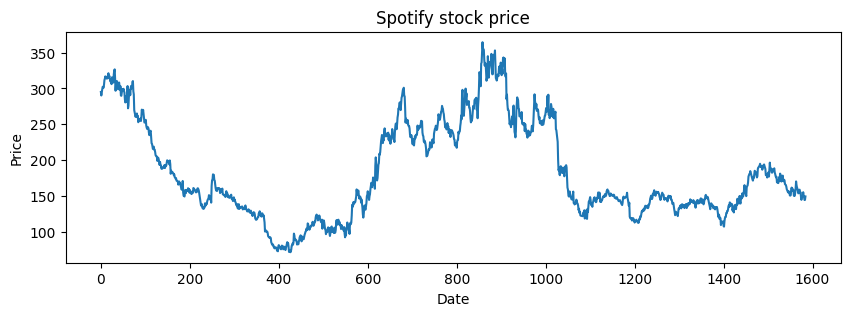

In [ ]:
close_price = spot_data['Close']

close_price.plot(xlabel='Date',ylabel='Price',label='Tsla',title=
                'Spotify stock price',figsize=(10,3))


In [ ]:
close_price = spot_data['Close']
vol_data = spot_data['Volume']
high_price = spot_data['High']
low_price = spot_data['Low']
open_price = spot_data['Open']

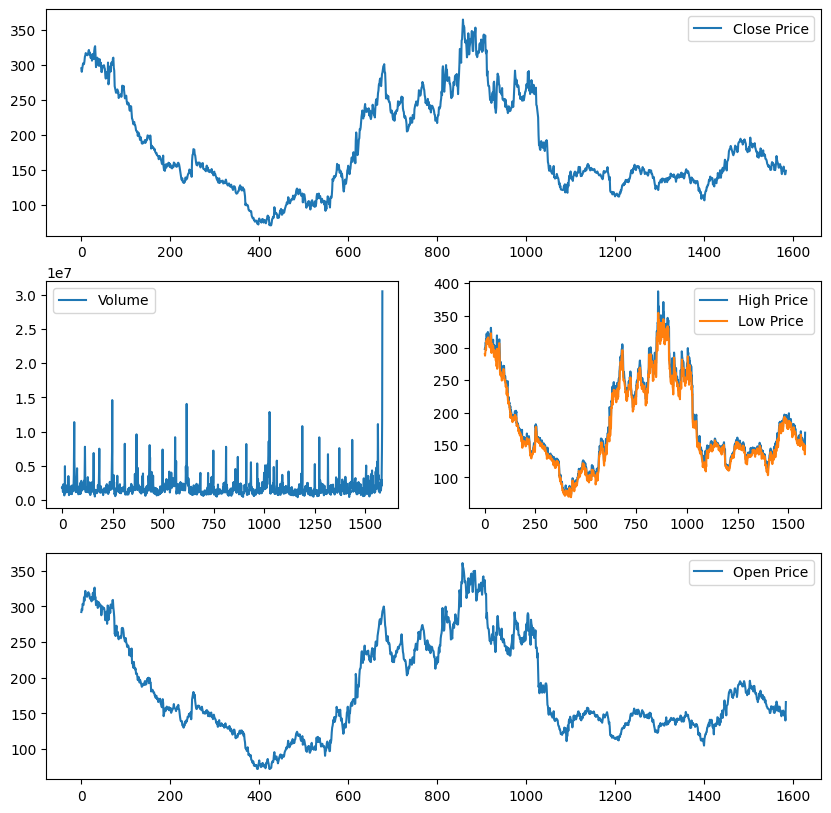

In [ ]:
plt.figure(figsize=(10,10))

# Subplot for Close Price
plt.subplot(3,1,1)
plt.plot(close_price, label='Close Price')
plt.legend()

# Subplot for Volume
plt.subplot(3,2,3)
plt.plot(vol_data, label='Volume')
plt.legend()

# Subplot for High/Low Price
plt.subplot(3,2,4)
plt.plot(high_price, label='High Price')
plt.plot(low_price, label='Low Price')
plt.legend()

# Subplot for Open Price
plt.subplot(3,1,3)
plt.plot(open_price, label='Open Price')
plt.legend()

plt.show()


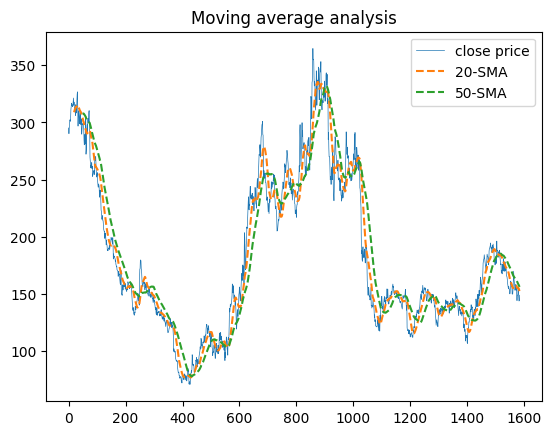

In [ ]:
# calulate the moving average
spot_data['SMA_20'] = spot_data['Close'].rolling(20).mean()
spot_data['SMA_50'] = spot_data['Close'].rolling(50).mean()
plt.figure(1)
plt.plot(spot_data['Close'],label='close price',linewidth=0.5)
plt.plot(spot_data['SMA_20'],label='20-SMA',linestyle='--')
plt.plot(spot_data['SMA_50'],label='50-SMA',linestyle='--')

plt.title('Moving average analysis')
plt.legend()
plt.show()



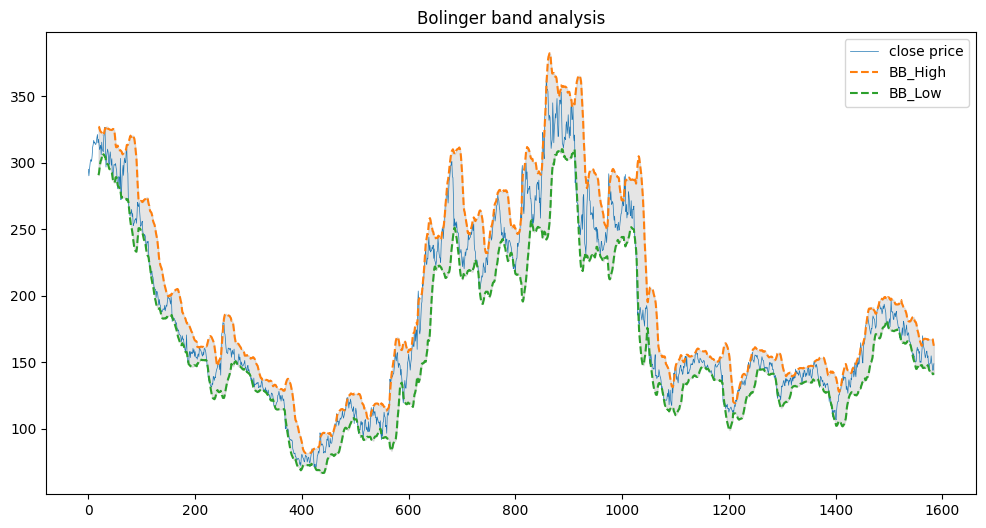

In [ ]:
import ta
# bollinger band
bb = ta.volatility.BollingerBands(spot_data['Close'],window=20,window_dev=2)

spot_data['BB_High']=bb.bollinger_hband()
spot_data['BB_Low']=bb.bollinger_lband()
plt.figure(1,(12,6))
plt.plot(spot_data['Close'],label='close price',linewidth=0.5)
plt.plot(spot_data['BB_High'],label='BB_High',linestyle='--')
plt.plot(spot_data['BB_Low'],label='BB_Low',linestyle='--')
plt.fill_between(spot_data.index,spot_data['BB_High'],
                 spot_data['BB_Low'],color = 'gray',alpha=0.2)
plt.title('Bolinger band analysis')
plt.legend()
plt.show()

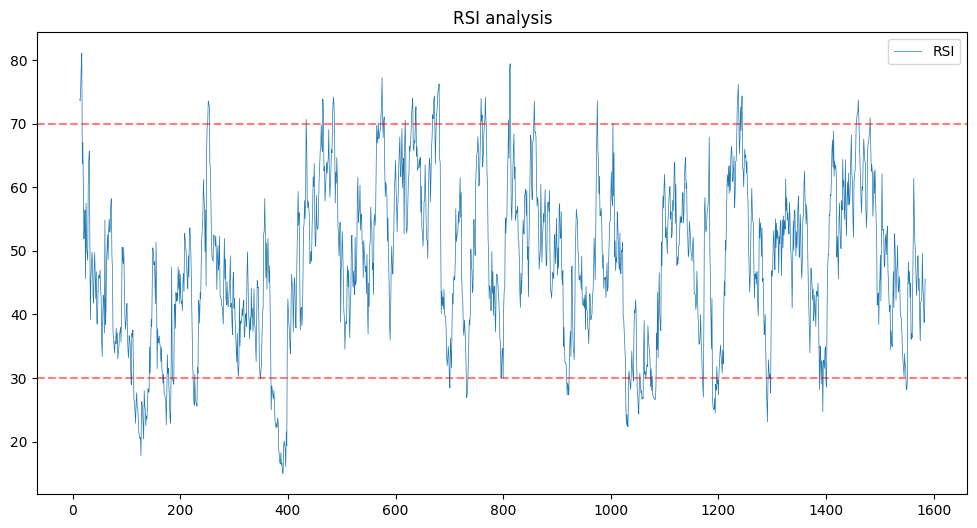

In [ ]:
# relative strength index
spot_data['RSI'] = ta.momentum.rsi(spot_data['Close'],window=14)

plt.figure(1,(12,6))
plt.plot(spot_data['RSI'],label='RSI',linewidth=0.5)
plt.axhline(70,linestyle='--',color='red',alpha=0.5)
plt.axhline(30,linestyle='--',color='red',alpha=0.5)
plt.title('RSI analysis')
plt.legend()


In [ ]:
spot_data.tail()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume,SMA_20,SMA_50,BB_High,BB_Low,RSI
1580,1580,2018-04-09,SPOT,150.00,151.00,148.59,149.50,2051432,155.3210,158.5530,167.403460,143.238540,44.377937
1581,1581,2018-04-06,SPOT,147.92,148.73,144.67,146.07,4228091,155.0040,158.0244,167.506548,142.501452,42.331972
1582,1582,2018-04-05,SPOT,143.99,152.41,141.25,149.23,7372840,154.1845,157.4038,167.303522,141.065478,38.701425
1583,1583,2018-04-04,SPOT,144.22,148.93,135.51,140.00,11702875,152.8955,156.7262,164.527134,141.263866,39.030984
1584,1584,2018-04-03,SPOT,149.01,169.00,148.26,165.90,30526507,152.1020,156.2900,162.449468,141.754532,45.591546


In [ ]:
spot_data.to_csv('SPOT_new.csv')

In [ ]:
start = datetime.datetime(2018,1,1)
end = datetime.datetime(2020,12,31)
print(start)
print(end)

2018-01-01 00:00:00
2020-12-31 00:00:00


In [ ]:
stock = ['INFY']
data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())).stack('Symbols')
data.head()

,Attributes,Close,High,Low,Open,Volume
Date,Symbols,,,,,
2020-12-31,INFY,16.3751,16.4517,16.3123,16.4331,3.823448e+06
2020-12-30,INFY,16.3555,16.4233,16.2583,16.2975,4.013354e+06
2020-12-29,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
2020-12-28,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
2020-12-24,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06


In [ ]:
newdata= data.reset_index()
newdata.head()

Attributes,Date,Symbols,Close,High,Low,Open,Volume
0,2020-12-31,INFY,16.3751,16.4517,16.3123,16.4331,3.823448e+06
1,2020-12-30,INFY,16.3555,16.4233,16.2583,16.2975,4.013354e+06
2,2020-12-29,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
3,2020-12-28,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
4,2020-12-24,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06


In [ ]:
newdata.to_csv('INFY.csv')

In [ ]:
path = '/content/INFY.csv'
infy_data = pd.read_csv(path)
infy_data.head()

,Unnamed: 0,Date,Symbols,Close,High,Low,Open,Volume
0,0,2020-12-31,INFY,16.3751,16.4517,16.3123,16.4331,3.823448e+06
1,1,2020-12-30,INFY,16.3555,16.4233,16.2583,16.2975,4.013354e+06
2,2,2020-12-29,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
3,3,2020-12-28,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
4,4,2020-12-24,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06


In [ ]:
infy_data.set_index('Date', inplace=True)
infy_data.head()
infy_data.sort_index(ascending=True,inplace=True)

In [ ]:
infy_data.tail()

,Unnamed: 0,Symbols,Close,High,Low,Open,Volume
Date,,,,,,,
2020-12-24,4,INFY,16.0364,16.1238,15.9599,16.1140,1.367021e+06
2020-12-28,3,INFY,16.2014,16.2681,16.1522,16.1620,4.388148e+06
2020-12-29,2,INFY,16.1916,16.3270,16.1052,16.3270,8.771338e+06
2020-12-30,1,INFY,16.3555,16.4233,16.2583,16.2975,4.013354e+06
2020-12-31,0,INFY,16.3751,16.4517,16.3123,16.4331,3.823448e+06


In [ ]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pandas as pd
import numpy as np

In [ ]:
infy_data = data.iloc[:-24] # -24 means from the end 24 samples deducted
infy_data.tail()
# i want to forecast the one year data
tempData = infy_data['Close']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An u

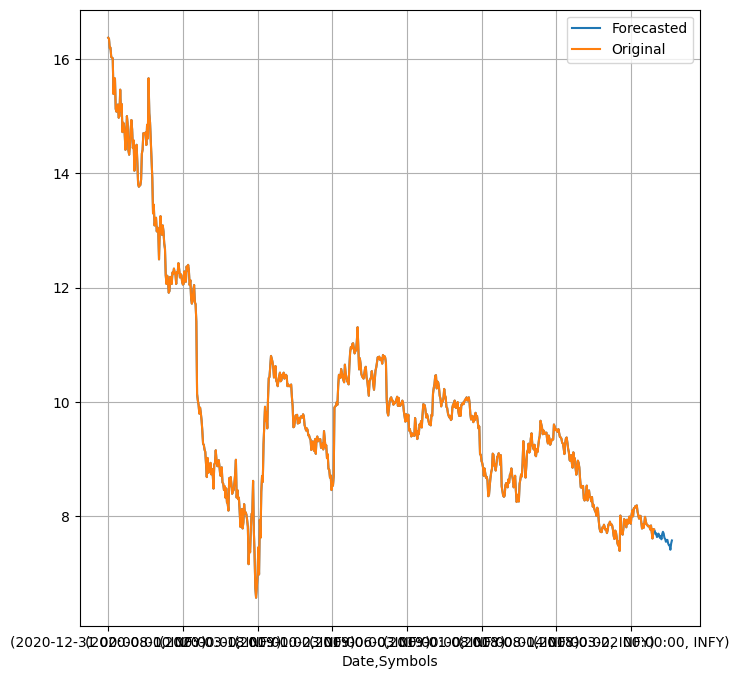

In [ ]:
plt.figure(1,(8,8))
tempData.plot(label='Forecasted')
infy_data['Close'].plot(label='Original')
plt.legend()
plt.grid('on')
plt.show()

In [ ]:
tempData.tail()

751    7.493149
752    7.489691
753    7.412651
754    7.521107
755    7.575217
dtype: float64

In [ ]:
tempData.head()

(2020-12-31 00:00:00, INFY)    16.3751
(2020-12-30 00:00:00, INFY)    16.3555
(2020-12-29 00:00:00, INFY)    16.1916
(2020-12-28 00:00:00, INFY)    16.2014
(2020-12-24 00:00:00, INFY)    16.0364
dtype: float64

In [ ]:
tempData

(2020-12-31 00:00:00, INFY)    16.375100
(2020-12-30 00:00:00, INFY)    16.355500
(2020-12-29 00:00:00, INFY)    16.191600
(2020-12-28 00:00:00, INFY)    16.201400
(2020-12-24 00:00:00, INFY)    16.036400
                                 ...    
751                             7.493149
752                             7.489691
753                             7.412651
754                             7.521107
755                             7.575217
Length: 756, dtype: float64

print all the data stats from one function
1. all the statical functions when you take users input and values to them


In [ ]:
stock = input('Please enter the stock with the symbol you want to check ')
custom_stock(stock)

Please enter the stock with the symbol you want to check SPOT


KeyError: 'Requested level (Symbols) does not match index name (None)'

In [102]:
# !pip install pandas_datareader
import pandas_datareader.data as pdr
import datetime

def custom_stock(stock):
  start = datetime.datetime(2023, 1, 1)
  try:
    end = datetime.datetime.now()
    data = pdr.DataReader(stock,'stooq',str(start.date()),str(end.date())) # Remove .stack('Symbols')
  except Exception as e:
    print(f"Error: The label {stock} was not found.")
    return None

    return data
  # If the data has a multi-index and 'Symbols' is a valid level, use:
  # data = data.stack('Symbols')

  close_price = data['Close'] # Assuming 'Close' is a column in the DataFrame
  vol_data = data['Volume']
  high_price = data['High']
  low_price = data['Low']
  open_price = data['Open']

  plt.figure(figsize=(10,10))

  # Subplot for Close Price
  plt.subplot(3,1,1)
  plt.plot(close_price, label='Close Price')
  plt.legend()

  # Subplot for Volume
  plt.subplot(3,2,3)
  plt.plot(vol_data, label='Volume')
  plt.legend()

  # Subplot for High/Low Price
  plt.subplot(3,2,4)
  plt.plot(high_price, label='High Price')
  plt.plot(low_price, label='Low Price')
  plt.legend()

  # Subplot for Open Price
  plt.subplot(3,1,3)
  plt.plot(open_price, label='Open Price')
  plt.legend()

  plt.show()


  plt.figure(2)
    # calulate the moving average
  data['SMA_20'] = data['Close'].rolling(20).mean()
  data['SMA_50'] = data['Close'].rolling(50).mean()
  plt.figure(1)
  plt.plot(data['Close'],label='close price',linewidth=0.5)
  plt.plot(data['SMA_20'],label='20-SMA',linestyle='--')
  plt.plot(data['SMA_50'],label='50-SMA',linestyle='--')

  plt.title('Moving average analysis')
  plt.legend()
  plt.show()


  import ta
  # bollinger band
  bb = ta.volatility.BollingerBands(icici['Close'],window=20,window_dev=2)

  data['BB_High']=bb.bollinger_hband()
  data['BB_Low']=bb.bollinger_lband()
  plt.figure(3,(12,6))
  plt.plot(data['Close'],label='close price',linewidth=0.5)
  plt.plot(data['BB_High'],label='BB_High',linestyle='--')
  plt.plot(data['BB_Low'],label='BB_Low',linestyle='--')
  plt.fill_between(data.index,data['BB_High'],
                  data['BB_Low'],color = 'gray',alpha=0.2)
  plt.title('Bolinger band analysis')
  plt.legend()
  plt.show()


  # relative strength index
  data['RSI'] = ta.momentum.rsi(data['Close'],window=14)

  plt.figure(1,(12,6))

  plt.plot(data['RSI'],label='RSI',linewidth=0.5)
  plt.axhline(70,linestyle='--',color='red',alpha=0.5)
  plt.axhline(30,linestyle='--',color='red',alpha=0.5)
  plt.title('RSI analysis')
  plt.legend()



stock = input('Please enter the stock with the symbol you want to check ')
custom_stock(stock)

Please enter the stock with the symbol you want to check aeface


KeyError: 'Close'